In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv('C:/Users/nhu/OneDrive - Florida International University/PHC_Avd_Bio3/fev1.csv')

In [7]:
df.head()

,Y1,Y0,T,d
0,0.87,0.93,0,NaN
1,1.26,1.27,0,NaN
2,1.54,1.32,0,NaN
3,1.36,1.29,0,NaN
4,1.26,1.35,0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      520 non-null    float64
 1   Y0      520 non-null    float64
 2   T       520 non-null    int64  
 3   d       258 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 16.4 KB


In [11]:
df.shape

(520, 4)

In [35]:
#restrict to treated (T=1)
df_T = df[df['T'] == 1]

In [45]:
df_Y0_T = df[df['T'] == 1]["Y0"]
df_Y0_T

262    2.66
263    2.17
264    1.78
265    1.05
266    0.81
       ... 
515    1.59
516    2.46
517    1.69
518    1.27
519    2.75
Name: Y0, Length: 258, dtype: float64

In [46]:
df_Y1_T = df[df['T'] == 1]["Y1"]
df_Y1_T

262    2.60
263    2.05
264    2.17
265    1.06
266    0.96
       ... 
515    1.32
516    2.83
517    1.43
518    1.12
519    2.68
Name: Y1, Length: 258, dtype: float64

In [70]:
##Two sample t test
stats.ttest_ind(df_Y1_T, df_Y0_T, equal_var=False)

Ttest_indResult(statistic=1.506622144080651, pvalue=0.13252919910496355)

In [71]:
###Paired t test
stats.ttest_rel(df_Y1_T, df_Y0_T)

Ttest_relResult(statistic=4.422406009779903, pvalue=1.4419484379792243e-05)

In [12]:
# bootstrap settings
# in this example, obtain 2000 bootstrap samples by drawing 200 observations each sample

np.random.seed(48602)
samples = 2000
draws = 200

In [58]:
boot_sample_Y0 = pd.DataFrame(boot_sample_Y0 )

In [149]:
boot_sample_Y0 = []
for i in range(samples):
    boot_sample_Y0 += [df_Y0_T.sample(draws, replace=True).median()]

In [157]:
boot_sample_Y0

[1.45,
 1.44500005,
 1.4400001,
 1.48,
 1.54,
 1.37,
 1.475,
 1.36,
 1.49,
 1.4849999999999999,
 1.4299999,
 1.35,
 1.4400001,
 1.415,
 1.45,
 1.4649999999999999,
 1.44500005,
 1.455,
 1.41,
 1.435,
 1.42,
 1.4400001,
 1.42,
 1.4249999500000001,
 1.47,
 1.37,
 1.435,
 1.4400001,
 1.435,
 1.4649999999999999,
 1.41,
 1.42,
 1.4049999999999998,
 1.41,
 1.455,
 1.46,
 1.41,
 1.48,
 1.435,
 1.47,
 1.4249999500000001,
 1.41,
 1.4300000499999999,
 1.4300000499999999,
 1.415,
 1.42,
 1.55,
 1.41,
 1.47,
 1.54,
 1.415,
 1.52,
 1.45,
 1.4300000499999999,
 1.39,
 1.59,
 1.3200001,
 1.41,
 1.5,
 1.54,
 1.45,
 1.4249999500000001,
 1.46,
 1.415,
 1.4249999500000001,
 1.42,
 1.42,
 1.44500005,
 1.5,
 1.365,
 1.45,
 1.48,
 1.455,
 1.47,
 1.45,
 1.4400001,
 1.495,
 1.41,
 1.42,
 1.41,
 1.47,
 1.49,
 1.42,
 1.42,
 1.4649999999999999,
 1.5350000000000001,
 1.45,
 1.4049999999999998,
 1.41,
 1.42,
 1.475,
 1.41,
 1.41,
 1.44500005,
 1.38,
 1.475,
 1.42,
 1.42,
 1.41,
 1.4400001,
 1.4249999500000001,
 1.53

In [151]:
boot_sample_Y1 = []
for i in range(samples):
    boot_sample_Y1 += [df_Y1_T.sample(draws, replace=True).median()]

In [56]:
boot_sample_Y1

,0
0,1.560
1,1.510
2,1.480
3,1.570
4,1.510
...,...
1995,1.530
1996,1.485
1997,1.540
1998,1.565


In [155]:
pd.DataFrame(boot_sample_Y0).describe()

,0
count,2000.000000
mean,1.445610
std,0.048246
min,1.260000
25%,1.415000
50%,1.440000
75%,1.470000
max,1.650000


In [156]:
pd.DataFrame(boot_sample_Y1).describe()

,0
count,2000.000000
mean,1.515972
std,0.050883
min,1.350000
25%,1.480000
50%,1.520000
75%,1.550000
max,1.685000


Text(1.49, 200, '$\\mu=1.44, \\sigma=0.047$')

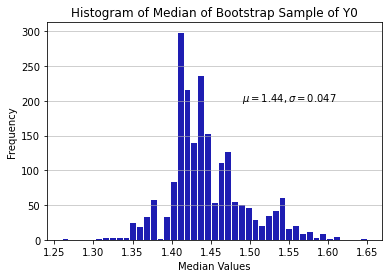

In [152]:
import matplotlib.pyplot as plt

plt.hist(x=boot_sample_Y0, bins='auto', color='#0504aa', alpha=0.9, rwidth=0.85)
plt.title('Histogram of Median of Bootstrap Sample of Y0')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Median Values')
plt.ylabel('Frequency')
plt.text(1.49, 200, r'$\mu=1.44, \sigma=0.047$')

Text(1.349, 200, '$\\mu=1.51, \\sigma=0.053$')

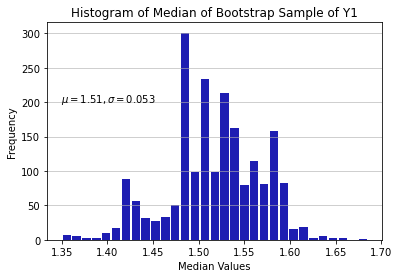

In [153]:
plt.hist(x=boot_sample_Y1, bins='auto', color='#0504aa',alpha=0.9, rwidth=0.85)
plt.title('Histogram of Median of Bootstrap Sample of Y1')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Median Values')
plt.ylabel('Frequency')
plt.text(1.349, 200, r'$\mu=1.51, \sigma=0.053$')

In [154]:
stats.ttest_ind(boot_sample_Y0, boot_sample_Y1)

Ttest_indResult(statistic=-44.87606341010411, pvalue=0.0)

In [110]:
np.histogram(boot_sample_Y0)

(array([  1,  15,  62, 496, 825, 343, 142,  90,  24,   2], dtype=int64),
 array([1.26, 1.3 , 1.34, 1.38, 1.42, 1.46, 1.5 , 1.54, 1.58, 1.62, 1.66]))

In [111]:
np.histogram(boot_sample_Y1)

(array([  3,  27, 185, 131, 589, 510, 424, 116,  12,   3], dtype=int64),
 array([1.3200001 , 1.35800009, 1.39600008, 1.43400007, 1.47200006,
        1.51000005, 1.54800004, 1.58600003, 1.62400002, 1.66200001,
        1.7       ]))